<a href="https://colab.research.google.com/github/sanjithrana/AI-ML-TASKS/blob/main/AI_ML_TASKS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score
)

In [2]:
# 1. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:

print("Shape of X:", X.shape)
print("Target classes:", data.target_names)


Shape of X: (569, 30)
Target classes: ['malignant' 'benign']


In [4]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 4. Fit Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [7]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

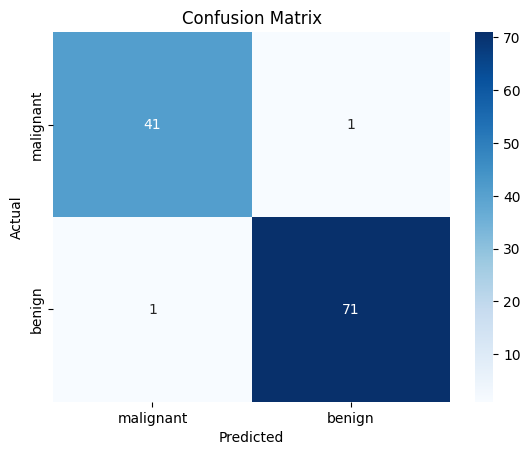

In [8]:
# 5. Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Precision: 0.9861111111111112
Recall: 0.9861111111111112


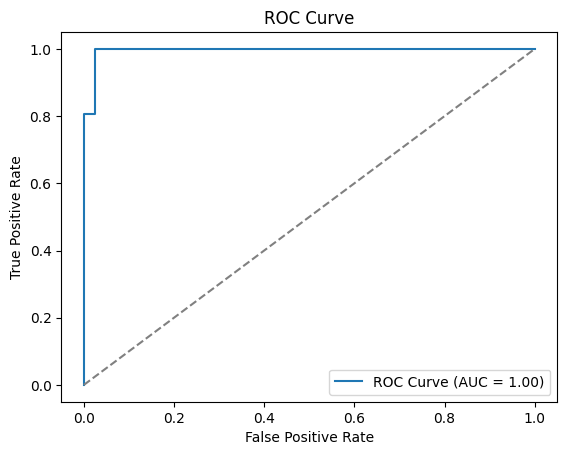

In [10]:
# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [11]:
# 6. Threshold tuning
thresholds_list = [0.3, 0.5, 0.7]
for th in thresholds_list:
    preds = (y_prob >= th).astype(int)
    print(f"\nThreshold: {th}")
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))


Threshold: 0.3
Precision: 0.972972972972973
Recall: 1.0

Threshold: 0.5
Precision: 0.9861111111111112
Recall: 0.9861111111111112

Threshold: 0.7
Precision: 0.9852941176470589
Recall: 0.9305555555555556


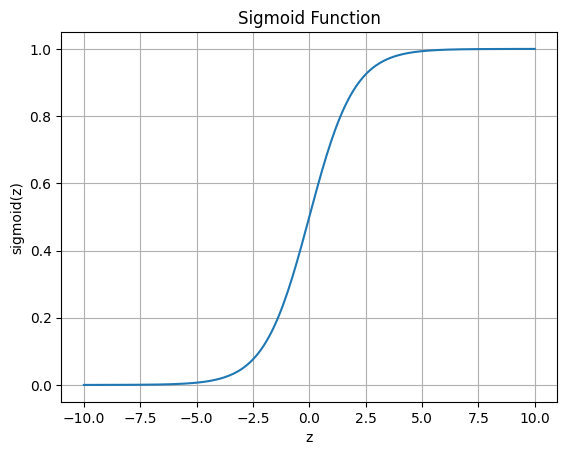

In [12]:

# 7. Sigmoid function demonstration
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
